# Homework 4

### Snow Hydrology

### Clinton Alden

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import datetime as dt

### Problem 1: Snowpack temperature profiles

In Lab4-1, we plotted vertical profiles of snowpack temperature on multiple, sequential days. Replicate these plots for all days from the first half of April (April 1–15). Find 4-5 days during this period where some significant behavior in the snowpack temperatures changes. Isolate the plots to only these 3-5 days. What is going on here? Why are the snowpack temperatures acting the way they are? Note: Please do not include plots for 15 days in your homework. Once you have found the "interesting behavior", only include plots that show these 3-5 days.

In [5]:
sos_file = "../data/sos_full_dataset_30min.nc"
sos_dataset = xr.open_dataset(sos_file)

tsnow_vars = [v for v in sos_dataset if 'Tsnow_' in v and v.endswith('_d')]
snow_depth_vars = ['SnowDepth_d']

tsnow_vars = [
    'Tsnow_0_4m_d',
    'Tsnow_0_5m_d',
    'Tsnow_0_6m_d',
    'Tsnow_0_7m_d',
    'Tsnow_0_8m_d',
    'Tsnow_0_9m_d',
    'Tsnow_1_0m_d',
    'Tsnow_1_1m_d',
    'Tsnow_1_2m_d',
    'Tsnow_1_3m_d',
    'Tsnow_1_4m_d',
    'Tsnow_1_5m_d'
]
tsnow_data = sos_dataset[tsnow_vars]

tsnow_data = tsnow_data.to_dataframe()

<Axes: xlabel='time'>

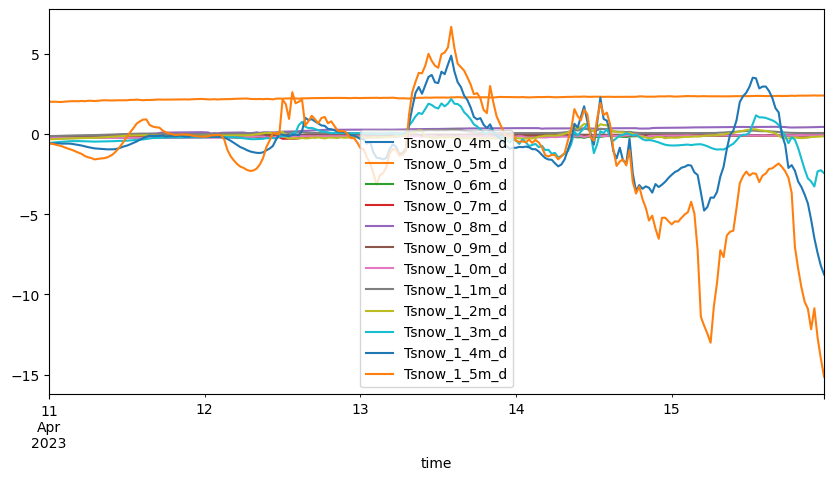

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

tsnow_data.loc['20230411': '20230415'].plot(ax=ax)

I highlighted above the period from 11 April to 15 April above. What we are seeing above is the result of snow melt or compaction which decreased snow depth. Now, some of the temperature sensors are air above the snow surface. We can see the 1.4m and 1.5m sensors in particular undergoing a large temperature range and seeing temperatures above 0C consistently, indicating the sensors are now measuring air temperatures. Additionally, the other sensors indicate an isothermal temperature profile which also supports the snow melt hypothesis.

### Problem 2: Snowpack internal energy

In Lab 4-2, we estimated the "change in snowpack internal energy" term by using an estimate of constant snowpack density. In Lab 4-3, we examined actual measurements of snow density from snowpits. In Lab 2-3, we examined estimates of snow density from snow-pillow SWE and snow depth measurements. Combining your knowledge from these labs, complete the following steps:

#### A. Using the snowpit dataset, calculate the depth-averaged snowpack density for each snowpit-day (i.e. you should have one density value for day in the snowpit dataset).

#### B. Using the main sos dataset, calculate the daily-averaged, depth-averaged snowpack density (we did this in Lab 2-3).


#### C. Plot the two time series of daily snowpack density from the two different datasets on the same plot.


#### D. Describe the differences between the two. Describe how changes in snowpack density will result in a different estimate of the "change in snowpack internal energy term", assuming all other measurements stay the same. According to the equation below (copied from Lab 4-2), will increasing/decreasing density cause an estimate of the change-in-internal-energy term to increase or decrease?

$\frac{d}{dt}(\Delta z U) = \rho_s c^{ice}_p \Delta z \frac{d}{dt} \left\langle T_s \right\rangle$